# A notebook to test plotting bfs.

In [174]:
import sys, os
import numpy as np
import numpy.ma as ma
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import ascii
import pandas as pd
import sqlite3
from lsst.sims.utils import _angularSeparation

%matplotlib inline

Read the simulation DB to know what bf to plot.

In [17]:
_path = os.path.expanduser('~/maf_local/Documents/opsimv4_data/run_dir/bfs/')
data_str = 'opsimv4_data/run_dir/bf_{}_{}_{}.npy'

In [12]:
con = sqlite3.connect(os.path.join(_path,"pontus_2491.db"))

In [13]:
df = pd.read_sql_query("select filter,observationId,night from SummaryAllProps", con)

In [91]:
obs_filter = df['filter'][0]
obs_id = df['observationId'][0]
obs_night = df['night'][0]
print(obs_filter,obs_id,obs_night)

r 1 1


In [102]:
data_path = os.path.join(_path, data_str.format(obs_night, obs_filter, obs_id-1))
os.path.exists(data_path)
print('{} Exists[{}]'.format(data_path,os.path.exists(data_path)))

/home/docmaf/maf_local/Documents/opsimv4_data/run_dir/bfs/opsimv4_data/run_dir/bf_1_r_10.npy Exists[True]


In [181]:
bfs = np.load(data_path)
bfs = np.load('/home/docmaf/maf_local/Documents/opsimv4_data/run_dir/bf_1_r_10.npy')

In [145]:
for key in bfs[()].keys():
    print(key)

M5
Skybrightness
Target
MeridianStripeBasisFunction
Slewtime
Strict
Avoid
Bulk
Moon
reward


In [97]:
hourangle = '<lsst.sims.featureScheduler.basis_functions.HourAngle_bonus_basis_function object at 0x7f6c09139828>'
targetmap = '<lsst.sims.featureScheduler.basis_functions.Target_map_basis_function object at 0x7f6c09139940>'
slewtime = '<lsst.sims.featureScheduler.basis_functions.Slewtime_basis_function object at 0x7f6c09139a90>'

In [147]:
cmin = np.min(bfs[()]['reward'][bfs[()]['reward']>0])
cmax = np.max(bfs[()]['reward'])

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


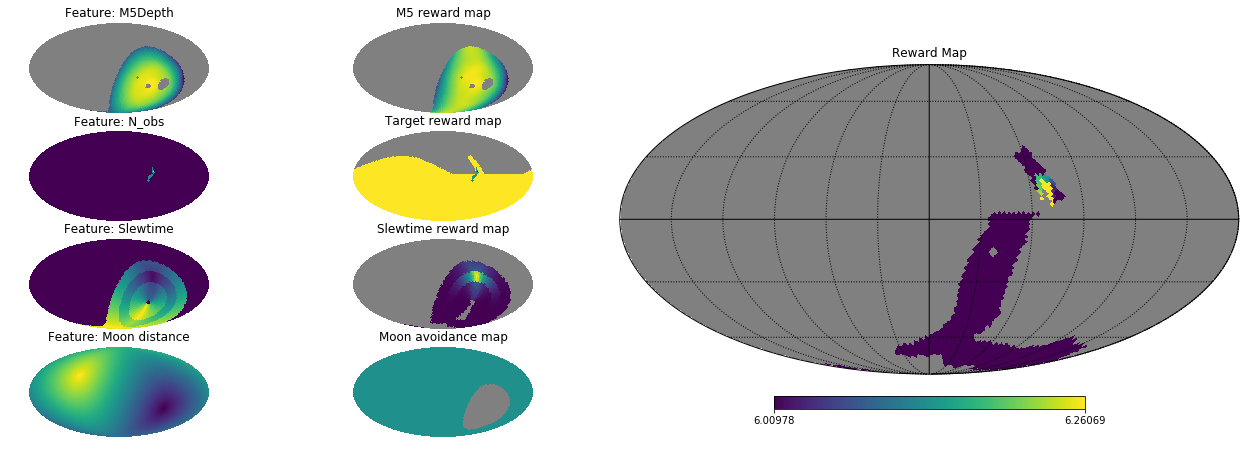

In [182]:
fig = plt.figure(figsize=(18,6))

hp.mollview(bfs[()]['reward'], title='Reward Map', sub=(1,2,2), min=cmin, max=cmax)
hp.graticule()

hp.mollview(bfs[()]['M5']['condition_features']['M5Depth'], 
            title='Feature: M5Depth', sub=(4,4,1), cbar=False)
# hp.graticule()

hp.mollview(bfs[()]['Target']['survey_features']['N_obs'], 
            title='Feature: N_obs', sub=(4,4,5), cbar=False)
# hp.graticule()

hp.mollview(bfs[()]['Slewtime']['condition_features']['slewtime'], 
            title='Feature: Slewtime', sub=(4,4,9), cbar=False)
# hp.graticule()

angular_distance = _angularSeparation(bfs[()]['Moon']['condition_features']['altaz']['az'], 
                                      bfs[()]['Moon']['condition_features']['altaz']['alt'],
                                      bfs[()]['Moon']['condition_features']['moon']['moonAz'],
                                      bfs[()]['Moon']['condition_features']['moon']['moonAlt'])

hp.mollview(angular_distance, 
            title='Feature: Moon distance', sub=(4,4,13), cbar=False)

hp.mollview(bfs[()]['M5']['basis_function'], 
            title='M5 reward map', sub=(4,4,2), cbar=False)
# hp.graticule()

hp.mollview(bfs[()]['Target']['basis_function'], 
            title='Target reward map', sub=(4,4,6), cbar=False)
# hp.graticule()

hp.mollview(bfs[()]['Moon']['basis_function'], 
            title='Moon avoidance map', sub=(4,4,14), cbar=False)


bfs_map = bfs[()]['Slewtime']['basis_function']
if type(bfs_map) == float:
    bfs_map = np.zeros(hp.nside2npix(32))+bfs_map
hp.mollview(bfs_map, 
            title='Slewtime reward map', sub=(4,4,10), cbar=False)
# hp.graticule()
fig.savefig('test.png')

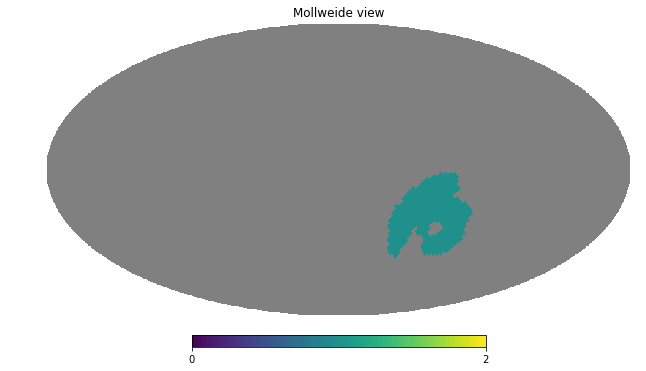

In [149]:
hp.mollview(bfs[()]['Skybrightness']['basis_function'])

0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3


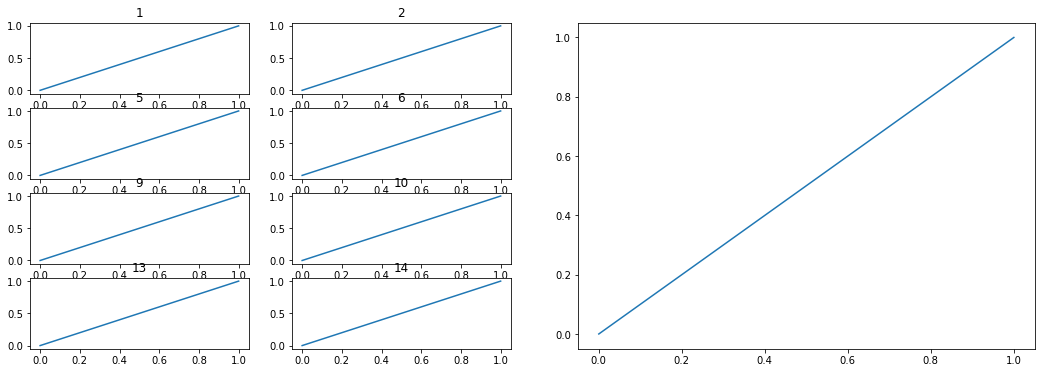

In [167]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,2)
ax.plot([0, 1], [0,1])

for i in range(4*4):
    print(i%4)
    if i%4 < 2:
        ax = fig.add_subplot(4,4,i+1)
        ax.plot([0, 1], [0,1])
        ax.set_title('%i' % (i+1))

In [84]:
hp.graticule?

In [100]:
obs_filter = df['filter'][10]
obs_id = df['observationId'][10]
obs_night = df['night'][10]

In [113]:
name = hourangle.split('.')[-1].split(' ')[0]  # .split('_')[0]
print(name)

HourAngle_bonus_basis_function


In [163]:
for key in bfs[()].keys():
    print(key)

M5
Target
MeridianStripeBasisFunction
Slewtime
Strict
Avoid
Bulk
Moon
reward


In [164]:
bfs[()]['Moon'] #['Slewtime']['condition_features']['slewtime']

{'basis_function': array([ 1.,  1.,  1., ...,  1.,  1.,  1.]),
 'condition_features': {'altaz': {'alt': array([-0.53650944, -0.55178667, -0.51888497, ...,  0.50389673,
           0.53650944,  0.55178667]),
   'az': array([ 0.02786056,  6.27283627,  6.25560955, ...,  3.15165666,
           3.16945321,  3.13124361])},
  'lmst': 19.652818070246603,
  'moon': {'moonAlt': 1.1000448689588527,
   'moonAz': 4.7116571808070473,
   'moonDec': -0.46585719290222333,
   'moonPhase': 38.509631941522457,
   'moonRA': 4.6126371179151535}},
 'survey_features': {}}